## Introduccion:
Existen muchas fuentes textuales: redes sociales, reportes, libros, entre otras, que generan grandes cantidades de texto. Es necesario revisar como obtener los archivos de texto plano para realizar los distintos tipos de analisis: desde la extraccion de fuentes estructuradas y no estructuradas, la limpieza del texto antes de su analisis, al problema de convertir texto manuscrito a digital.

## La mineria de texto
La mineria de texto hace referencia a la extraccion de conocimiento relevante de texto (principalmente, de texto sin estructura). A grandes rasgos, se pueden identificar varios procesos dentro de la mineria de texto:
* Preprocesamiento, donde se limpian y preparan los datos para su analisis.
* Analisis exploratorio, donde se buscan errores, frecuencias, construccion de conjuntos de prueba.
* Representacion, donde el texto se codifica de manera numerica para poder ser procesado en modelos matematicos
* Modelamiento, donde se prepara un modelo matematico para tareas de agrupacion y descripcion.
* Validacion, donde se evalua la efectividad del modelo.

Para el preprocesamiento y el analisis exploratorio se pueden usar las herramientas de analisis linguistico, mientras que para la representacion y los modelos se pueden usar bolsas de palabras, tablas de frecuencias invertidas (TF-IDF) y modelos de machine learning. Sin embargo, antes de empezar cualquier tarea de preprocesamiento, es necesario obtener el texto. 

## Obtener texto de un archivo .txt
Los archivos txt son algunos de los tipos de archivos mas comunes de donde se obtiene texto sin formato. De manera sencilla, y para aprovechar la carga de archivos en Colab, se puede construir un archivo de prueba.

In [1]:
%%writefile archivo.txt
Esta es una prueba de texto.
Es bueno que tenga varias lineas.
La gran ventaja es que no tiene formato.

Writing archivo.txt


El archivo esta almacenado de manera local en el mismo directorio temporal de la sesion activa. Los archivos que se suben al entorno aparecerian en el mismo sitio. Para leer el contenido del archivo, se debe crear una instancia del mismo con la funcion open()

In [2]:
archivo=open('archivo.txt')

In [3]:
archivo

<_io.TextIOWrapper name='archivo.txt' mode='r' encoding='UTF-8'>

Para leer el contenido a una variable local, se usa read()

In [4]:
texto=archivo.read()
texto

'Esta es una prueba de texto.\nEs bueno que tenga varias lineas.\nLa gran ventaja es que no tiene formato.'

La funcion read() se guia por un cursor que recorre el archivo. Si se vuelve a utilizar devuelve un resultado en blanco, porque el cursor ya esta al final del archivo. 

In [5]:
# Para regresar el cursor al inicio del texto
archivo.seek(0)
# Para leer el archivo linea por linea
linea=archivo.readlines()
linea

['Esta es una prueba de texto.\n',
 'Es bueno que tenga varias lineas.\n',
 'La gran ventaja es que no tiene formato.']

Tambien se pueden añadir lineas al archivo, borrar sus contenidos o reorganizarlos dentro del mismo archivo.

## Obtener texto de un archivo .pdf
Los archivos pdf son fuentes textuales bastante utilizadas. Tienen formatos e imagenes aparte del texto lo que hace que la extraccion de texto sea mas complicada. Dependiendo de la libreria que se utilice y la forma en que fue construido el texto, es posible que el proceso de lectura no funcione. Una de las librerias mas utilizadas es PyPDF2. 

In [6]:
!pip install pypdf2

     |████████████████████████████████| 81kB 3.7MB/s 
  Created wheel for pypdf2: filename=PyPDF2-1.26.0-cp37-none-any.whl size=61102 sha256=ea2aee9e66a5351226e79fee387c931c8a0a425a58eb95c1b58ca7cd0fb3554f
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built pypdf2


In [7]:
import PyPDF2

Es necesario subir un archivo pdf al entorno para realizar la lectura. Es posible hacerlo directamente desde una direccion url, descargando el archivo y guardandolo.

In [8]:
!wget "https://maguared.gov.co/wp-content/uploads/2015/10/a_la_diestra_de_dios_padre_leersmicuento_08.pdf"

--2021-07-09 20:04:20--  https://maguared.gov.co/wp-content/uploads/2015/10/a_la_diestra_de_dios_padre_leersmicuento_08.pdf
Resolving maguared.gov.co (maguared.gov.co)... 199.250.221.133
Connecting to maguared.gov.co (maguared.gov.co)|199.250.221.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4022794 (3.8M) [application/pdf]
Saving to: ‘a_la_diestra_de_dios_padre_leersmicuento_08.pdf’

a_la_diestra_de_dio 100%[===================>]   3.84M  18.2MB/s    in 0.2s    

2021-07-09 20:04:20 (18.2 MB/s) - ‘a_la_diestra_de_dios_padre_leersmicuento_08.pdf’ saved [4022794/4022794]



In [9]:
libro=open('/content/a_la_diestra_de_dios_padre_leersmicuento_08.pdf','rb')

Se lee el archivo pdf

In [12]:
lib=PyPDF2.PdfFileReader(libro)
print(type(lib))
print(lib.numPages)

<class 'PyPDF2.pdf.PdfFileReader'>
32


Para extraer una pagina particular

In [14]:
lib.getPage(4)

{'/ArtBox': [21, 21, 602.102, 786.354],
 '/BleedBox': [21, 21, 602.102, 786.354],
 '/Contents': {'/Filter': '/FlateDecode'},
 '/CropBox': [0, 0, 623.102, 807.354],
 '/MediaBox': [0, 0, 623.102, 807.354],
 '/Parent': {'/Count': 5,
  '/Kids': [IndirectObject(1049, 0),
   IndirectObject(1, 0),
   IndirectObject(8, 0),
   IndirectObject(12, 0),
   IndirectObject(15, 0)],
  '/Parent': {'/Count': 32,
   '/Kids': [IndirectObject(109, 0),
    IndirectObject(110, 0),
    IndirectObject(111, 0),
    IndirectObject(112, 0),
    IndirectObject(113, 0),
    IndirectObject(114, 0)],
   '/Type': '/Pages'},
  '/Type': '/Pages'},
 '/Resources': {'/ColorSpace': {'/CS0': ['/Separation',
    '/All',
    '/DeviceGray',
    {'/C0': [1],
     '/C1': [0],
     '/Domain': [0, 1],
     '/FunctionType': 2,
     '/N': 1,
     '/Range': [0, 1]}]},
  '/ExtGState': {'/GS0': {'/AIS': <PyPDF2.generic.BooleanObject at 0x7fbf38cdd650>,
    '/BM': '/Normal',
    '/CA': 1,
    '/OP': <PyPDF2.generic.BooleanObject at 0x7fb

En esta hay mucho texto que hace referencia al formato del texto. La mayoria de las paginas tienen este formato por las margenes, colores y detalles del archivo. Para extraer el texto se puede usar extractText() sobre una de las paginas

In [16]:
r=lib.getPage(4).extractText()
r

'5Este dizque era un hombre que se llamaba Peralta. Vivía en un pajarate muy \ngrande y muy viejo, en el propio camino real y afuerita de un pueblo donde vivía \nel Rey. No era casao y vivía con una hermana soltera, algo viejona y muy aburrida.No había en el pueblo quién no conociera a Peralta por sus muchas caridades: él lavaba los llaguientos; él asistía a los enfermos; él enterraba a los muertos; se \nquitaba el pan de la boca y los trapitos del cuerpo para dárselos a los pobres; y \npor eso era que estaba en la pura inopia; y a la hermana se la llevaba el diablo \ncon todos los limosneros y leprosos que Peralta mantenía en la casa. ﬁ¿Qué te \nganás, hombre de Dios -le decía la hermana-, con trabajar como un macho, si \ntodo lo que conseguís lo botás jartando y vistiendo a tanto perezoso y holgazán? \nCasáte, hombre; casáte pa que tengás hijos a quién mantenerﬂ. ﬁCálle la boca, \nhermanita, y no diga disparates. Yo no necesito de hijos, ni de mujer ni de \nnadie, porque tengo mi pró

Algunos caracteres no se reconocen de forma automatica, y los saltos de linea no se realizan. Para empezar a trabajar aun hay que realizar un preprocesamiento.

In [17]:
# Podemos reemplazar los saltos de linea
r=r.replace('\n','')
r

'5Este dizque era un hombre que se llamaba Peralta. Vivía en un pajarate muy grande y muy viejo, en el propio camino real y afuerita de un pueblo donde vivía el Rey. No era casao y vivía con una hermana soltera, algo viejona y muy aburrida.No había en el pueblo quién no conociera a Peralta por sus muchas caridades: él lavaba los llaguientos; él asistía a los enfermos; él enterraba a los muertos; se quitaba el pan de la boca y los trapitos del cuerpo para dárselos a los pobres; y por eso era que estaba en la pura inopia; y a la hermana se la llevaba el diablo con todos los limosneros y leprosos que Peralta mantenía en la casa. ﬁ¿Qué te ganás, hombre de Dios -le decía la hermana-, con trabajar como un macho, si todo lo que conseguís lo botás jartando y vistiendo a tanto perezoso y holgazán? Casáte, hombre; casáte pa que tengás hijos a quién mantenerﬂ. ﬁCálle la boca, hermanita, y no diga disparates. Yo no necesito de hijos, ni de mujer ni de nadie, porque tengo mi prójimo a quién servir.

In [18]:
# Podemos separar el texto por los espacios
tokens= r.split()
print(tokens[:10])

['5Este', 'dizque', 'era', 'un', 'hombre', 'que', 'se', 'llamaba', 'Peralta.', 'Vivía']


In [19]:
# Importamos una libreria para trabajar con expresiones regulares, regex (re)
import re
r2=' '.join(re.findall('[^!,.¿?<>¡»«]+',r))
tokens2= r2.split()
print(tokens2[:10])

['5Este', 'dizque', 'era', 'un', 'hombre', 'que', 'se', 'llamaba', 'Peralta', 'Vivía']


Se puede hacer analisis de frecuencias sobre las palabras del texto

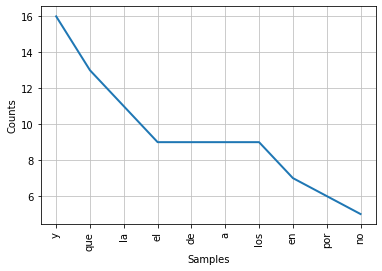

In [20]:
# Usamos la libreria nltk (Natural Language Tool Kit)
import nltk
# Para hacer el conteo de frecuencias
freq_dist = nltk.FreqDist(tokens2)
# Para graficar las palabras con las 10 frecuencias mas altas
freq_dist.plot(10, cumulative=False)

Hay muchas palabras que se repiten, pero no aportan mucho. Se denominan stopwords.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


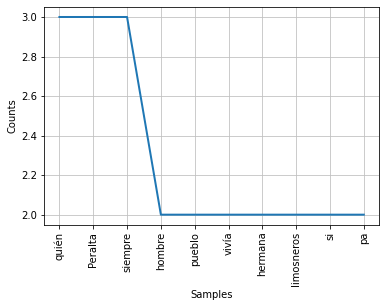

In [21]:
# Importar las stop words
nltk.download("stopwords")
from nltk.corpus import stopwords
# Se retiran las stop words junto a los caracteres de longitud 1
tokens_limpios = [tok for tok in tokens if len(tok.lower())>1 and (tok.lower() not in stopwords.words("spanish"))]
freq_dist_limpia = nltk.FreqDist(tokens_limpios)
freq_dist_limpia.plot(10, cumulative=False)

Aqui solo lo estamos haciendo para una pagina. Usando un ciclo, se puede extrar todo el texto.

In [22]:
r=''
for i in range(lib.numPages):
  r=r+lib.getPage(i).extractText()
r

'˜˚˛˝˙ˆˇ˘˙˝˜˚˛˝˙ˆˇ˘˙˝M˜˚˜˛˝˙ˆ˜ˇ ˘˙ Cˇ\nMariana Garcés Córdoba\n˜\nM˜˚˜˛˝˙ˆ˜ˇ ˘˙ E˘˜˜ˇ˚\nMaría Fernanda Campo Saavedra\n˜˙ ˙˘˜˚\n˙˘˜˝ˇˆ\nIván Hernández\nˆ˘˜˚˘˜˝ˇ\nJenny Alexandra Rodríguez\n˘˜˛ˆ ˙˘˜˝ˇ\nNe˜alí Vanegas\n\nOlga Cuéllar\n˘˜˝ˇ\nNahum Montt, Consuelo Gaitán, Iván Hernández, \nMoisés Melo y Jorge Orlando Melo\nPrimera edición, 2014\n˚\n: 978-958-8827-06-3© Ministerio de Cultura. Derechos patrimoniales reservados \nsobre las ilustraciones de Olga Cuéllar. \n© Herederos de Tomás Carrasquilla.\nMaterial de distribución gratuita. \nLos derechos de esta edición corresponden al Ministerio de \nCultura; el permiso para su reproducción física o digital se \notorgará únicamente en los casos en que no hay ánimo de lucro.\nAgradecemos solicitar el permiso escribiendo a:\nliteraturaylibro@mincultura.gov.co\nˆ˙˛ˇ ˙˚: \nabril\n ˘˙ 2014\nImpreso por: Imprenta Nacional de Colombia\n45Este dizque era un hombre que se llamaba Peralta. Vivía en un pajarate muy \ngrande y muy viejo, en el propio 

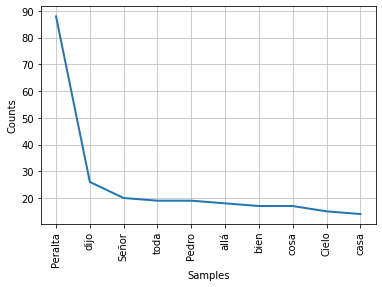

In [23]:
r2=' '.join(re.findall('[^!,.¿?<>¡»«]+',r))
tokens2= r2.split()
tokens_limpios = [tok for tok in tokens2 if len(tok.lower())>3 and (tok.lower() not in stopwords.words("spanish"))]
freq_dist_limpia = nltk.FreqDist(tokens_limpios)
freq_dist_limpia.plot(10, cumulative=False)

Como opcion mas llamativa, se puede usar una nube de palabras

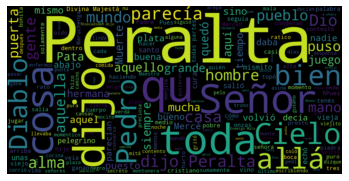

In [24]:
# Se importa la libreria wordcloud
from wordcloud import WordCloud
# Se genera la nube de palabras
wordcloud = WordCloud(stopwords=stopwords.words("spanish"), width=1600, height=800).generate(' '.join(tokens_limpios))
# Se grafica
import matplotlib.pyplot as plt 
%matplotlib inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Reconocimiento optico de caracteres, OCR
Mientras las fuentes de texto esten digitalizadas, la extraccion es posible, aun con errores. Pero un problema bastante grande es trabajar con texto manuscrito o con imagenes. En este caso se necesita un proceso de reconocimiento optico de caracteres, OCR, que busca identificar y clasificar el texto de una imagen. Este proceso tiene dos rutinas: la primera es identificar que grupo de pixeles corresponden a un caracter, y luego identificar que caracter es. 

La libreria mas comun para efectuar este proceso es pytesseract.

In [25]:
!pip install pytesseract
!sudo apt install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14071 sha256=74e0dd084626d31d432cd0318a4e821a71785a5d312dba458c11c142f87f5c53
  Stored in directory: /root/.cache/pip/wheels/a2/66/45/88bf1b2d428817a006944b9730b27d6861b776e05a9e262bd4
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [26]:
try:
 from PIL import Image
except ImportError:
 import Image
import cv2
import pytesseract

In [27]:
!which tesseract

/usr/bin/tesseract


In [28]:
pytesseract.pytesseract.tesseract_cmd=(r'/usr/bin/tesseract')

Para probar la libreria, se puede usar uno de los archivos de prueba del repositorio de pytesseract
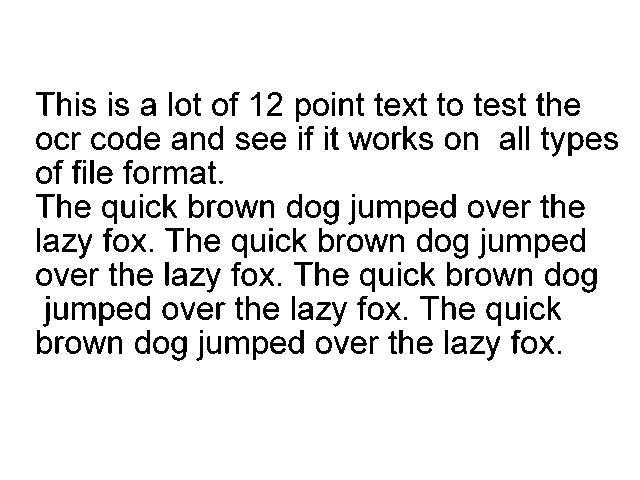

In [29]:
!wget "https://github.com/madmaze/pytesseract/raw/master/tests/data/test.png"

--2021-07-09 20:22:27--  https://github.com/madmaze/pytesseract/raw/master/tests/data/test.png
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/madmaze/pytesseract/master/tests/data/test.png [following]
--2021-07-09 20:22:27--  https://raw.githubusercontent.com/madmaze/pytesseract/master/tests/data/test.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11513 (11K) [image/png]
Saving to: ‘test.png’

test.png            100%[===================>]  11.24K  --.-KB/s    in 0s      

2021-07-09 20:22:28 (87.6 MB/s) - ‘test.png’ saved [11513/11513]



In [30]:
print(pytesseract.image_to_string('/content/test.png'))

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



In [32]:
# Probando con una imagen diferente y otra forma de guardar el archivo
import requests
url = 'https://repositorio.sena.edu.co/bitstream/handle/11404/3547/SENA-F-05053-2013052252.jpg'
r = requests.get(url, allow_redirects=True,verify=False)
open('SENA-F-05053-2013052252.jpg', 'wb').write(r.content)
print(pytesseract.image_to_string('/content/SENA-F-05053-2013052252.jpg'))

 

Proyecto del SENA en el Magdalena Medio.

 

Archivo Fotografico SENA, Regional Antioquia.



In [34]:
# En estructuras mas complejas, como una factura, habria que definir espacios 
# dentro de la imagen para buscar cada porcion de texto de manera independiente
url = 'https://cdn.finanzarel.com/wp-content/uploads/2019/01/15093404/factura-excel-1.jpg'
r = requests.get(url, allow_redirects=True,verify=False)
open('factura-excel-1.jpg', 'wb').write(r.content)
print(pytesseract.image_to_string('/content/factura-excel-1.jpg'))

Nombre de su compaiiia

Lema de su compatiia

Direccién FECHA: 03/01/2019
Ciudad, Cédigo postal FACTURA 100
Teléfono (503) 555-0190 Fax (503) 555-0191

POR: —_Descripcién del
FACTURAR A: proyecto o senvicio
Nombre
Nombre de la compatiia
Direccién
Ciudad, Cédigo postal
Teléfono

 

DESCRIPCION CANTIDAD

 

 

 

 

SUBTOTAL

TIPO IMPOSITIVO
IMPUESTO SOBRE VENTAS
OTROS

TOTAL

 

 

 

 

 

 

 

Extienda todos los cheques pagaderos a Nombre de su compaiiia
Total a pagar en 15 dias. Las cantidades vencidas tendrén un cargo de servicio de un 1% por mes

 



Se puede usar tesseract para convertir archivos pdf escaneados a texto, usando una libreria extra (pdf2image) para convertir a imagen cada pagina.

## Obtener texto de una pagina web
Las paginas web, al igual que los archivos pdf, tienen no solo texto sino estructura html, elementos CSS y Java, imagenes, etc. Para extraer el texto se puede realizar una limpieza de elementos de estructura usando BeautifulSoup. Primero se importan las librerias necesarias


In [35]:
import urllib
from bs4 import BeautifulSoup

Se obtiene una pagina web a partir de su url.

In [43]:
url='https://es.wikipedia.org/wiki/Servicio_Nacional_de_Aprendizaje'
response = urllib.request.urlopen(url=url)
response

Se puede extraer el codigo html de la pagina

In [44]:
html = response.read()
html

b'<!DOCTYPE html>\n<html class="client-nojs" lang="es" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Servicio Nacional de Aprendizaje - Wikipedia, la enciclopedia libre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"f2136705-43af-4077-b6e5-53eb442b96fc","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Servicio_Nacional_de_Aprendizaje","wgTitle":"Servicio Nacional de Aprendizaje","wgCurRevisionId":136155175,"wgRevisionId":136155175,"wgArticleId":368367,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia:Art\xc3\xadculos con identificadores VIAF","Wikipedia

Hay que limpiar las etiquetas de html y el codigo JavaScript. La libreria BeautifulSoup se encarga de realizar este preprocesamiento de manera automatica

In [45]:
# Se retira el html
c1= BeautifulSoup(html)
# Se retiran los scripts de JavaScript
[s.extract() for s in c1('script')] 
# Se extrae el texto resultante
texto = c1.get_text()00


SyntaxError: ignored

In [46]:
texto

'\n\n\nServicio Nacional de Aprendizaje - Wikipedia, la enciclopedia libre\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nServicio Nacional de Aprendizaje\n\nDe Wikipedia, la enciclopedia libre\n\n\n\nIr a la navegación\nIr a la búsqueda\nServicio Nacional de Aprendizaje\n\nDirección General, Chapinero - BogotáSigla\nSENALema\n«una entidad de clase mundial»Tipo\nPúblicaFundación\n21 de junio de 1957 (64\xa0años)[1]\u200bLocalizaciónDirección\nCalle 57 No. 8-69 BogotáColombiaOtras sedes\n33 regionalesAdministraciónRector\nCarlos Mario Estrada Molina(Director General)Presupuesto\nCOL$ 3,2 billones[2]\u200b (2014)[3]\u200bAcademiaEstudiantes\n9,8 millones (2014)\xa0•\xa0Pregrado\nTécnicosTecnologías\xa0•\xa0Posgrado\nProfundización Técnica Epecialización TecnológicaSitio web\nsena.edu.co[editar datos en Wikidata]\nEl Servicio Nacional de Aprendizaje (SENA) es un establecimiento público de Colombia que ofrece formación gratuita a millones de colombianos que se benef

Con algunas herramientas tambien se pueden extraer partes especificas de la pagina web, como tablas

In [47]:
import pandas as pd
dfs = pd.read_html(url)

In [48]:
dfs[0]

,Servicio Nacional de Aprendizaje,Servicio Nacional de Aprendizaje.1,Servicio Nacional de Aprendizaje.2
0,NaN,NaN,NaN
1,"Dirección General, Chapinero - Bogotá","Dirección General, Chapinero - Bogotá","Dirección General, Chapinero - Bogotá"
2,Sigla,SENA,SENA
3,Lema,«una entidad de clase mundial»,«una entidad de clase mundial»
4,Tipo,Pública,Pública
5,Fundación,21 de junio de 1957 (64 años)[1]​,21 de junio de 1957 (64 años)[1]​
6,Localización,Localización,Localización
7,Dirección,Calle 57 No. 8-69 BogotáColombia,Calle 57 No. 8-69 BogotáColombia
8,Otras sedes,33 regionales,33 regionales
9,Administración,Administración,Administración


Tambien es posible buscar elementos particulares de la estructura HTML

In [49]:
url='https://www.linio.com.co/cm/especial-celulares'
response = urllib.request.urlopen(url=url)
html = response.read()
c1= BeautifulSoup(html)

BeatifulSoup convierte un cadena de texto con formato HTML en un objeto con esa misma estructura (respetando los atributos y tags)

In [50]:
dt=c1.find_all('div')
dt

[<div class="top-header-mobile hidden-md-up"></div>,
 <div class="container-fluid container-semi-fluid header-container">
 <div class="header-section-menu col-lg-1 col-md-1 ">
 <div class="navbar-toggler" id="open-left-menu">
 <div class="icon icon-margin"></div>
 <div class="navbar-title hidden-md-down d-none d-lg-block">Categorías</div>
 </div>
 </div>
 <div class="header-section-main col-lg-9 col-md-8 primary-logo-with-promo col-10">
 <div class="header-logo">
 <a class="navbar-brand" href="/" title="Linio"></a>
 </div>
 <div class="promo-logo hidden-sm-down d-none d-md-block">
 <a class="canvas" href="/" target="_self">
 <div class="resizer">
 <picture class="image-wrapper">
 <source data-lazy="//i.linio.com/cms/e5419266-b7f4-11eb-8e5b-06372216eefd.png" type="image/webp">
 <source data-lazy="//i.linio.com/cms/e5419266-b7f4-11eb-8e5b-06372216eefd.png" type="image/jpeg">
 
 </source></source></picture>
 </div>
 </a>
 </div>
 <div class="mobile-search bg-medium-body" id="mobile-searc

Haciendo un poco de exploracion

In [58]:
dt[884]

<div class="price-section" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer">
<meta content="133900.00" itemprop="price"/>
<meta content="COP" itemprop="priceCurrency"/>
<meta content="/p/reloj-inteligente-a-prueba-de-agua-xiaomi-kumi-gw16t-ip67-xiaomi-reloj-tr3d92" itemprop="url"/>
<link href="http://schema.org/InStock" itemprop="availability"/>
<div class="discount-container">
<span class="original-price">$299.000</span>
<span class="discount">- 55%</span>
</div>
<div class="">
<div class="lowest-price">
<span class="price-main-md">
      $133.900
    </span>
</div>
</div>
</div>

Este div tiene informacion hacerca de un producto. Sacando los tags 'meta'

In [59]:
dt[884].find_all('meta')

[<meta content="133900.00" itemprop="price"/>,
 <meta content="COP" itemprop="priceCurrency"/>,
 <meta content="/p/reloj-inteligente-a-prueba-de-agua-xiaomi-kumi-gw16t-ip67-xiaomi-reloj-tr3d92" itemprop="url"/>]

## Obtener texto de Twitter
Una aplicacion muy util y utilizada en todos los ambitos, todos los dias, es extraer texto de los tweets de una persona u organizacion. Twitter maneja el flujo de esta informacion, y permite la extraccion de datos de su red (en la version gratuita, con restricciones a cantidad de datos y numero de consultas diarias). Para poder extraer informacion de Twitter, se necesita una cuenta de desarrollador. Esta debe crearse desde https://developer.twitter.com/en

Una vez preparada la cuenta y la api, se importan las librerias y se intenta conectar a la api creada.

In [60]:
!pip install python-twitter
import re 
import twitter

     |████████████████████████████████| 71kB 3.3MB/s 


In [61]:
# Aqui deben ingresarse los tokens obtenidos en la api recien creada
try: 
    api=twitter.Api(consumer_key='',
                    consumer_secret='',
                    access_token_key='',
                    access_token_secret='',
                    tweet_mode='extended')
    # Revisar autenticación
    print("Autenticación exitosa.")
except: 
    print("La autenticación falló, por favor revise los campos.") 

Autenticación exitosa.


Para simplificar el trabajo de extraccion, se define una funcion que extraiga el texto de los tweet

In [ ]:
def get_tweets(query, n_tweets):
    # Obtenemos los tweets
    tweets=[tweet.full_text for tweet in api.GetSearch(query, count = n_tweets)]
    return tweets

Y se buscan los tweets que mencionen a una entidad particular

In [ ]:
tweets=get_tweets("SENAComunica -filter:retweets",10)
tweets

['Empresario 👩\u200d💼 Hasta este 16 de abril puedes inscribir tu empresa en nuestra convocatoria #MiPymeSeTransforma 2021. ¡Apresúrate! y hazlo ingresando por: https://t.co/wUwlNRHM5T 😀¡Feliz #domingo! \n\n#SENAValle https://t.co/NgyYXnuMVi',
 '✍️👩\u200d💻La Regional #SENAValle te ofrece este espacio académico donde podrás obtener tu certificado por @LegisColombia, aún tenemos la última fecha 12 de abril. Inscríbete por👉: https://t.co/B9pG1TGHgW https://t.co/V4U9QWWDpm',
 '😷✨ 3️⃣6️⃣ Aprendices del Técnico en Enfermería, del #CGTS en #SENAValle que realizan su etapa productiva en la @FVLCali,  ya fueron vacunados con las dos dosis de la Vacuna contra el Covid-19 y  5️⃣ más están a la espera de su segunda dosis para completar 41 en total. https://t.co/54wuQ72oiJ',
 'Empresario del Valle del Cauca 😀‼️Recuerda que puedes inscribir tu empresa en nuestra convocatoria #MiPymesSeTransforma 2021 hasta el 16 de abril. Conoce los términos en: https://t.co/wUwlNRZnut \n#SENAValle https://t.co/HRIqK

Al igual que antes, aqui puede empezar a realizarse el preprocesamiento. La api de Twitter permite ademas realizar busquedas sobre una cuenta particular, o sobre una ubicacion geografica especifica. Ademas del texto de los tweets , tambien puede obtenerse metadata como el tiempo de publicacion, ubicacion, reacciones, retweets, etc.

No sobra ver algo de la metadata que tienen los tweets.

In [ ]:
tweet_sena = api.GetSearch(u"SENAValle -filter:retweets", lang="es", count=100)

In [ ]:
import pandas as pd
def extract_tweet_attributes(tweet_object):
    # create empty list
    tweet_list =[]
    # loop through tweet objects
    for tweet in tweet_object:
        tweet_id = tweet.id # unique integer identifier for tweet
        text = tweet.full_text # utf-8 text of tweet
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        created_at = tweet.created_at # utc time tweet created
        source = tweet.source # utility used to post tweet
        reply_to_status = tweet.in_reply_to_status_id # if reply int of orginal tweet id
        reply_to_user = tweet.in_reply_to_screen_name # if reply original tweetes screenname
        retweets = tweet.retweet_count # number of times this tweet retweeted
        favorites = tweet.favorite_count # number of time this tweet liked
        # append attributes to list
        tweet_list.append({'tweet_id':tweet_id, 
                          'text':text, 
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source, 
                          'reply_to_status':reply_to_status, 
                          'reply_to_user':reply_to_user,
                          'retweets':retweets,
                          'favorites':favorites})
    # create dataframe   
    df = pd.DataFrame(tweet_list, columns=['tweet_id',
                                           'text',
                                           'favorite_count',
                                           'retweet_count',
                                           'created_at',
                                           'source',
                                           'reply_to_status',
                                           'reply_to_user',
                                           'retweets',
                                           'favorites'])
    return df

In [ ]:
df = extract_tweet_attributes(tweet_sena)
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,1381230558651379717,Empresario 👩‍💼 Hasta este 16 de abril puedes i...,1,1,Sun Apr 11 13:00:01 +0000 2021,"<a href=""https://about.twitter.com/products/tw...",None,None,1,1
1,1380875713876611072,✍️👩‍💻La Regional #SENAValle te ofrece este esp...,0,0,Sat Apr 10 13:30:00 +0000 2021,"<a href=""https://about.twitter.com/products/tw...",None,None,0,0
2,1380629197706641415,😷✨ 3️⃣6️⃣ Aprendices del Técnico en Enfermería...,5,5,Fri Apr 09 21:10:26 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,None,5,5
3,1380626575402614784,Empresario del Valle del Cauca 😀‼️Recuerda que...,1,2,Fri Apr 09 21:00:01 +0000 2021,"<a href=""https://about.twitter.com/products/tw...",None,None,2,1
4,1380543524731510784,"¡Apresúrate, no te quedes sin tu cupo! 👩‍🎓✨El ...",1,1,Fri Apr 09 15:30:00 +0000 2021,"<a href=""https://about.twitter.com/products/tw...",None,None,1,1
